# Venture Funding with Deep Learning

You work as a risk management associate at Alphabet Soup, a venture capital firm. Alphabet Soup’s business team receives many funding applications from startups every day. This team has asked you to help them create a model that predicts whether applicants will be successful if funded by Alphabet Soup.

The business team has given you a CSV containing more than 34,000 organizations that have received funding from Alphabet Soup over the years. With your knowledge of machine learning and neural networks, you decide to use the features in the provided dataset to create a binary classifier model that will predict whether an applicant will become a successful business. The CSV file contains a variety of information about these businesses, including whether or not they ultimately became successful.

## Instructions:

The steps for this challenge are broken out into the following sections:

* Prepare the data for use on a neural network model.

* Compile and evaluate a binary classification model using a neural network.

* Optimize the neural network model.

### Prepare the Data for Use on a Neural Network Model 

Using your knowledge of Pandas and scikit-learn’s `StandardScaler()`, preprocess the dataset so that you can use it to compile and evaluate the neural network model later.

Open the starter code file, and complete the following data preparation steps:

1. Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.   

2. Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.
 
3. Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

4. Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

5. Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 

6. Split the features and target sets into training and testing datasets.

7. Use scikit-learn's `StandardScaler` to scale the features data.

### Compile and Evaluate a Binary Classification Model Using a Neural Network

Use your knowledge of TensorFlow to design a binary classification deep neural network model. This model should use the dataset’s features to predict whether an Alphabet Soup&ndash;funded startup will be successful based on the features in the dataset. Consider the number of inputs before determining the number of layers that your model will contain or the number of neurons on each layer. Then, compile and fit your model. Finally, evaluate your binary classification model to calculate the model’s loss and accuracy. 
 
To do so, complete the following steps:

1. Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.

2. Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.

> **Hint** When fitting the model, start with a small number of epochs, such as 20, 50, or 100.

3. Evaluate the model using the test data to determine the model’s loss and accuracy.

4. Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 

### Optimize the Neural Network Model

Using your knowledge of TensorFlow and Keras, optimize your model to improve the model's accuracy. Even if you do not successfully achieve a better accuracy, you'll need to demonstrate at least two attempts to optimize the model. You can include these attempts in your existing notebook. Or, you can make copies of the starter notebook in the same folder, rename them, and code each model optimization in a new notebook. 

> **Note** You will not lose points if your model does not achieve a high accuracy, as long as you make at least two attempts to optimize the model.

To do so, complete the following steps:

1. Define at least three new deep neural network models (the original plus 2 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.

2. After finishing your models, display the accuracy scores achieved by each model, and compare the results.

3. Save each of your models as an HDF5 file.


In [1]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

%matplotlib inline

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.  


In [2]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv(Path('Resources/applicants_data.csv'))

# Review the DataFrame
applicant_data_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Review the data types associated with the columns
applicant_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


### Step 2: Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.

In [4]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns=['EIN','NAME'])

# Review the DataFrame
applicant_data_df


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


### Step 3: Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

In [5]:
# Create a list of categorical variables 
categorical_variables = list(applicant_data_df.dtypes[applicant_data_df.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [6]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)


In [7]:
# Encode the categorical variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df[categorical_variables])


C:\Users\giffo\anaconda3\envs\dev\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names_out(categorical_variables)
)

# Review the DataFrame
encoded_df

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 4: Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

In [9]:
# drop categorical columns from applicant df
applicant_data_df = applicant_data_df.drop(columns = categorical_variables)

# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
encoded_df = pd.concat(
    [
        encoded_df,
        applicant_data_df
    ],
    axis = 1
)

# Review the Dataframe
encoded_df

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,STATUS,ASK_AMT,IS_SUCCESSFUL
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,108590,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,6692,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000,0
34295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000,0
34296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000,0
34297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000,1


### Step 5: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 



In [10]:
# Define the target set y using the IS_SUCCESSFUL column
y = encoded_df['IS_SUCCESSFUL']

# Display a sample of y
y.head()

0    1
1    1
2    0
3    1
4    1
Name: IS_SUCCESSFUL, dtype: int64

In [11]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = encoded_df.drop(columns='IS_SUCCESSFUL')

# Review the features DataFrame
X.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,STATUS,ASK_AMT
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,108590
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,6692
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,142590


### Step 6: Split the features and target sets into training and testing datasets.


In [12]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


### Step 7: Use scikit-learn's `StandardScaler` to scale the features data.

In [13]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


---

## Compile and Evaluate a Binary Classification Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [14]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features


116

In [15]:
# Define the number of neurons in the output layer
number_output_neurons = 1

### Output layer neurons = 1 because this is a binary classification model

In [16]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = (number_input_features + number_output_neurons) // 2

# Review the number hidden nodes in the first layer
hidden_nodes_layer1


58

In [17]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 =  (hidden_nodes_layer1 + number_output_neurons) // 2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2


29

In [18]:
# Create the Sequential model instance
nn = Sequential()


In [19]:
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim = number_input_features, activation = 'relu'))

In [20]:
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation = 'relu'))

In [21]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation = 'sigmoid'))

In [22]:
# Display the Sequential model summary
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 58)                6786      
                                                                 
 dense_1 (Dense)             (None, 29)                1711      
                                                                 
 dense_2 (Dense)             (None, 1)                 30        
                                                                 
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [23]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5788 - accuracy: 0.7206
Epoch 2/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5537 - accuracy: 0.7299
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5495 - accuracy: 0.7307
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5480 - accuracy: 0.7308
Epoch 5/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5459 - accuracy: 0.7329
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5447 - accuracy: 0.7335
Epoch 7/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5437 - accuracy: 0.7341
Epoch 8/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5427 - accuracy: 0.7351
Epoch 9/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5423 - accuracy: 0.7357
Epoch 10/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5413 - accuracy: 0.7361

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [25]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5518 - accuracy: 0.7300 - 397ms/epoch - 1ms/step
Loss: 0.5517609119415283, Accuracy: 0.7300291657447815


### Step 4: Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 


In [26]:
# Set the model's file path
file_path = Path('saved_models/AlphabetSoup.h5')

# Export your model to a HDF5 file
nn.save(file_path)

### Just for Me: Plot Accuracy and Loss of Model 1 (nn)

<Axes: >

<Axes: >

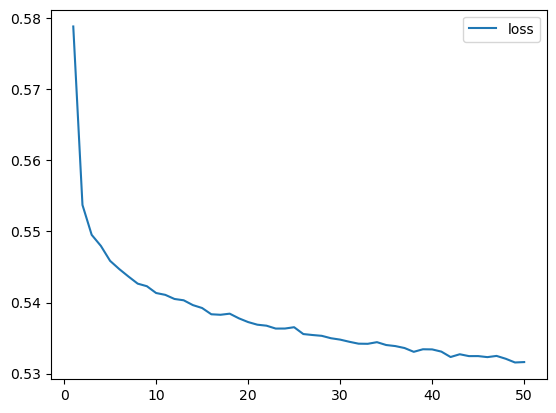

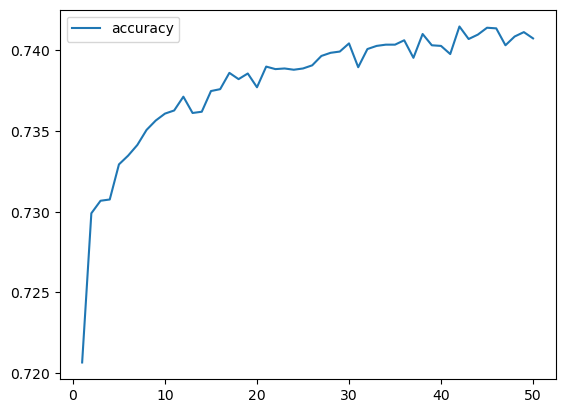

In [27]:
nn_plot = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"]) + 1))
display(nn_plot.plot(y="loss"))
display(nn_plot.plot(y="accuracy"))

---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


# Alternative Model 1: Adding a Third Hidden Layer, Going to 200 epochs

In [28]:
# Define the the number of inputs (features) to the model
number_input_features_A1 = len(X_train.iloc[0])

# Review the number of features
number_input_features_A1

116

In [29]:
# Define the number of neurons in the output layer
number_output_neurons_A1 = 1

### Output layer neurons = 1 because this is a binary classification model

In [30]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A1 = (number_input_features_A1 + number_output_neurons_A1) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A1

58

In [31]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A1 = (hidden_nodes_layer1_A1 + number_output_neurons_A1) // 2

# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A1

29

In [32]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A1 = (hidden_nodes_layer2_A1 + number_output_neurons_A1) // 2

# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A1

15

In [33]:
# Create the Sequential model instance
nn_A1 = Sequential()

In [34]:
# First hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer1_A1, input_dim = number_input_features_A1, activation = 'relu'))

# Second hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer2_A1, activation = 'relu'))

# Third hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer3_A1, activation = 'relu'))

# Output layer
nn_A1.add(Dense(units=number_output_neurons_A1, activation = 'sigmoid'))

# Check the structure of the model
nn_A1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 58)                6786      
                                                                 
 dense_4 (Dense)             (None, 29)                1711      
                                                                 
 dense_5 (Dense)             (None, 15)                450       
                                                                 
 dense_6 (Dense)             (None, 1)                 16        
                                                                 
Total params: 8,963
Trainable params: 8,963
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Compile the Sequential model
nn_A1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
# Fit the model using 50 epochs and the training data
fit_model_A1 = nn_A1.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5740 - accuracy: 0.7208
Epoch 2/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5514 - accuracy: 0.7311
Epoch 3/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5479 - accuracy: 0.7315
Epoch 4/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5463 - accuracy: 0.7348
Epoch 5/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5449 - accuracy: 0.7346
Epoch 6/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5442 - accuracy: 0.7336
Epoch 7/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5431 - accuracy: 0.7355
Epoch 8/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5417 - accuracy: 0.7362
Epoch 9/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5415 - accuracy: 0.7362
Epoch 10/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5411 - accura

### Evaluate Model

In [37]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss_A1, model_accuracy_A1 = nn_A1.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss_A1}, Accuracy: {model_accuracy_A1}")

268/268 - 0s - loss: 0.5688 - accuracy: 0.7290 - 386ms/epoch - 1ms/step
Loss: 0.5688307285308838, Accuracy: 0.7289795875549316


<Axes: >

<Axes: >

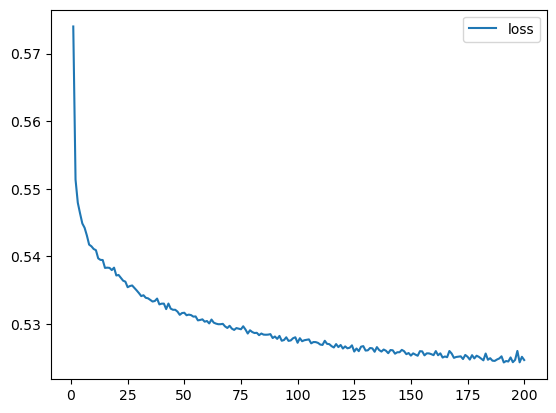

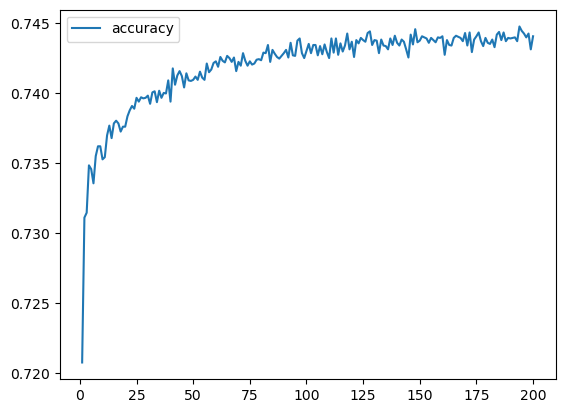

In [38]:
nn_A1_plot = pd.DataFrame(fit_model_A1.history, index=range(1, len(fit_model_A1.history["loss"]) + 1))
display(nn_A1_plot.plot(y="loss"))
display(nn_A1_plot.plot(y="accuracy"))

In [39]:
# Set the model's file path
file_path_1 = Path('saved_models/AlphabetSoup_A1.h5')

# Export your model to a HDF5 file
nn_A1.save(file_path_1)

# Alternative Model 2: Back to 2 Hidden Layers, 58 neurons per layer, and 100 epochs

In [40]:
# Define the the number of inputs (features) to the model
number_input_features_A2 = len(X_train.iloc[0])

# Review the number of features
number_input_features_A2

116

In [41]:
# Define the number of neurons in the output layer
number_output_neurons_A2 = 1

In [42]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A2 = (number_input_features_A2 + number_output_neurons_A2) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A2

58

In [43]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer2_A2 = (number_input_features_A2 + number_output_neurons_A2) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer2_A2

58

In [44]:
# Create the Sequential model instance
nn_A2 = Sequential()

In [45]:
# First hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer1_A2, input_dim = number_input_features_A2, activation = 'relu'))

# Second hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer2_A2, activation = 'relu'))

# Output layer
nn_A2.add(Dense(units=number_output_neurons_A2, activation = 'sigmoid'))

# Check the structure of the model
nn_A2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 58)                6786      
                                                                 
 dense_8 (Dense)             (None, 58)                3422      
                                                                 
 dense_9 (Dense)             (None, 1)                 59        
                                                                 
Total params: 10,267
Trainable params: 10,267
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Compile the model
nn_A2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
# Fit the model
fit_model_A2 = nn_A2.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5727 - accuracy: 0.7181
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5532 - accuracy: 0.7292
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5506 - accuracy: 0.7311
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5475 - accuracy: 0.7313
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5462 - accuracy: 0.7334
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5453 - accuracy: 0.7337
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5442 - accuracy: 0.7327
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5433 - accuracy: 0.7338
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5424 - accuracy: 0.7338
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5417 - accura

### Evaluate Model

In [48]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss_A2, model_accuracy_A2 = nn_A2.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss_A2}, Accuracy: {model_accuracy_A2}")

268/268 - 0s - loss: 0.5596 - accuracy: 0.7308 - 387ms/epoch - 1ms/step
Loss: 0.5595952868461609, Accuracy: 0.7308454513549805


<Axes: >

<Axes: >

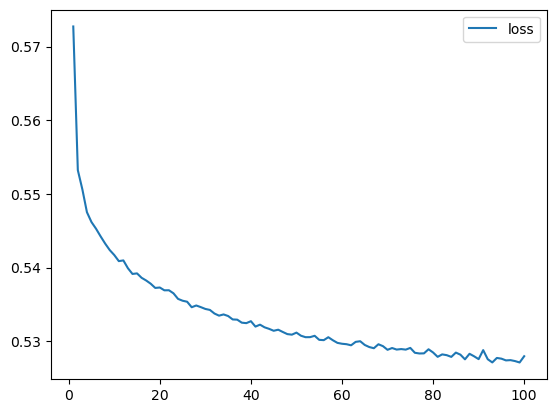

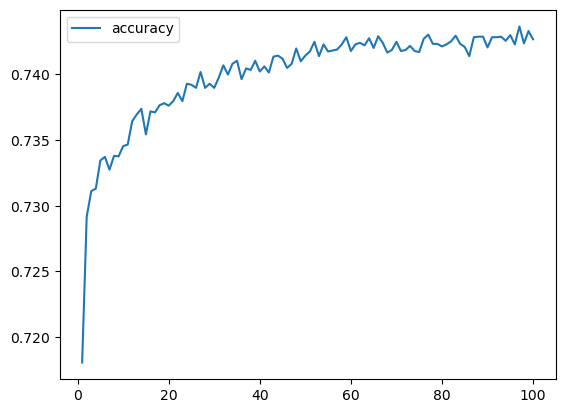

In [49]:
nn_A2_plot = pd.DataFrame(fit_model_A2.history, index=range(1, len(fit_model_A2.history["loss"]) + 1))
display(nn_A2_plot.plot(y="loss"))
display(nn_A2_plot.plot(y="accuracy"))

In [50]:
# Set the model's file path
file_path_2 = Path('saved_models/AlphabetSoup_A2.h5')

# Export your model to a HDF5 file
nn_A2.save(file_path_2)

# Alternative Model 3: Original Dataset, Different Activations, 4 Hidden Layers

### Create Model

In [51]:
# Define the the number of inputs (features) to the model
number_input_features_A3 = len(X_train.iloc[0])

# Define the number of neurons in the output layer
number_output_neurons_A3 = 1


In [52]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A3 = (number_input_features_A3 + number_output_neurons_A3) // 2

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A3 =  (hidden_nodes_layer1_A3 + number_output_neurons_A3) // 2

# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A3 = (hidden_nodes_layer2_A3 + number_output_neurons_A3) // 2

# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A3 =  (hidden_nodes_layer3_A3 + number_output_neurons_A3) // 2

In [53]:
# Create the Sequential model instance
nn_A3 = Sequential()

In [54]:
# Add the first hidden layer
nn_A3.add(Dense(units=hidden_nodes_layer1_A3, input_dim = number_input_features_A3, activation = 'relu'))

# Add the second hidden layer
nn_A3.add(Dense(units=hidden_nodes_layer2_A3, activation = 'relu'))

# Add the third hidden layer
nn_A3.add(Dense(units=hidden_nodes_layer3_A3, activation = 'tanh'))

# Add the fourth hidden layer
nn_A3.add(Dense(units=hidden_nodes_layer4_A3, activation = 'tanh'))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A3.add(Dense(units=number_output_neurons_A3, activation = 'sigmoid'))

# Display the Sequential model summary
nn_A3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 58)                6786      
                                                                 
 dense_11 (Dense)            (None, 29)                1711      
                                                                 
 dense_12 (Dense)            (None, 15)                450       
                                                                 
 dense_13 (Dense)            (None, 8)                 128       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,084
Trainable params: 9,084
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Compile the Sequential model
nn_A3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [56]:
# Fit the model using 50 epochs and the training data
fit_model_A3 = nn_A3.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5675 - accuracy: 0.7197
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5528 - accuracy: 0.7280
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5492 - accuracy: 0.7317
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5471 - accuracy: 0.7320
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5467 - accuracy: 0.7314
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5452 - accuracy: 0.7332
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5440 - accuracy: 0.7343
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5436 - accuracy: 0.7330
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5427 - accuracy: 0.7347
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5424 - accura

### Evaluate Model

In [57]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss_A3, model_accuracy_A3 = nn_A3.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss_A3}, Accuracy: {model_accuracy_A3}")

268/268 - 0s - loss: 0.5528 - accuracy: 0.7299 - 391ms/epoch - 1ms/step
Loss: 0.5528090596199036, Accuracy: 0.729912519454956


<Axes: >

<Axes: >

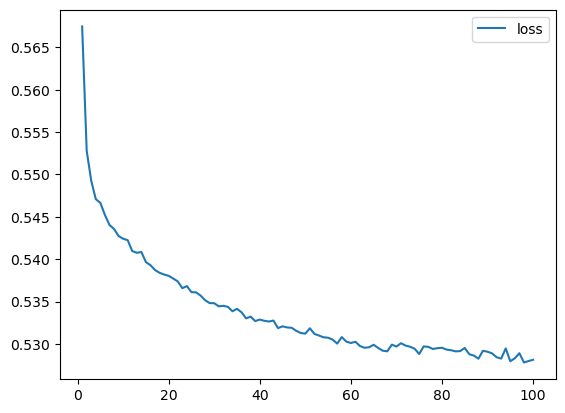

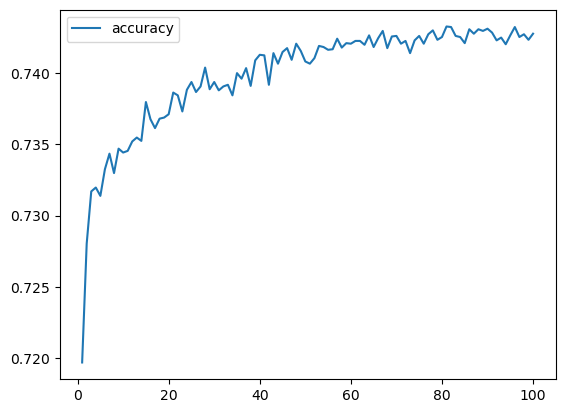

In [58]:
nn_A3_plot = pd.DataFrame(fit_model_A3.history, index=range(1, len(fit_model_A3.history["loss"]) + 1))
display(nn_A3_plot.plot(y="loss"))
display(nn_A3_plot.plot(y="accuracy"))

In [59]:
# Set the model's file path
file_path_3 = Path('saved_models/AlphabetSoup_A3.h5')

# Export your model to a HDF5 file
nn_A3.save(file_path_3)

# Alternative Model 4: Feature Engineering

In [60]:
# Read copy of applicants_data.csv into new df for feature engineering 
applicant_data_df_A4= pd.read_csv(Path('Resources/applicants_data.csv'))

# Drop EIN and NAME as before.
# Also drop AFFILIATION, ORGANIZATION (hypothesizing that these have little predictive value for success)
# Also drop STATUS and SPECIAL CONSIDERATIONS (don't know to what they refer, and the sets are very imbalanced)
applicant_data_df_A4 = applicant_data_df_A4.drop(columns=['EIN','NAME','AFFILIATION','ORGANIZATION','SPECIAL_CONSIDERATIONS','STATUS'])
applicant_data_df_A4

,APPLICATION_TYPE,CLASSIFICATION,USE_CASE,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,C1000,ProductDev,0,5000,1
1,T3,C2000,Preservation,1-9999,108590,1
2,T5,C3000,ProductDev,0,5000,0
3,T3,C2000,Preservation,10000-24999,6692,1
4,T3,C1000,Heathcare,100000-499999,142590,1
...,...,...,...,...,...,...
34294,T4,C1000,ProductDev,0,5000,0
34295,T4,C3000,ProductDev,0,5000,0
34296,T3,C2000,Preservation,0,5000,0
34297,T5,C3000,ProductDev,0,5000,1


In [61]:
# Create a list of categorical variables 
categorical_variables_A4 = list(applicant_data_df_A4.dtypes[applicant_data_df_A4.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables_A4

['APPLICATION_TYPE', 'CLASSIFICATION', 'USE_CASE', 'INCOME_AMT']

In [62]:
# Create a OneHotEncoder instance
enc_A4 = OneHotEncoder(sparse=False)

# Encode the categorical variables using OneHotEncoder
encoded_data_A4 = enc_A4.fit_transform(applicant_data_df_A4[categorical_variables_A4])


# Create a DataFrame with the encoded variables
encoded_df_A4 = pd.DataFrame(
    encoded_data_A4,
    columns = enc_A4.get_feature_names_out(categorical_variables_A4)
)

# drop categorical columns from applicant df
applicant_data_df_A4 = applicant_data_df_A4.drop(columns = categorical_variables_A4)

# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
encoded_df_A4 = pd.concat(
    [
        encoded_df_A4,
        applicant_data_df_A4
    ],
    axis = 1
)

# Review the Dataframe
encoded_df_A4

C:\Users\giffo\anaconda3\envs\dev\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,ASK_AMT,IS_SUCCESSFUL
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108590,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6692,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000,0
34295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000,0
34296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000,0
34297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000,1


### Split Data


In [63]:
# Define the target set y using the IS_SUCCESSFUL column
y = encoded_df_A4['IS_SUCCESSFUL']

# Display a sample of y
y.head()

0    1
1    1
2    0
3    1
4    1
Name: IS_SUCCESSFUL, dtype: int64

In [64]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = encoded_df_A4.drop(columns='IS_SUCCESSFUL')

# Review the features DataFrame
X.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,ASK_AMT
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108590
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6692
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,142590


### Train Test Split

In [65]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


### Scale

In [66]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


### Create Model

In [67]:
# Define the the number of inputs (features) to the model
number_input_features_A4 = len(X_train.iloc[0])

# Define the number of neurons in the output layer
number_output_neurons_A4= 1

# Review
print(f"Input Features: {number_input_features_A4}, Output Neurons: {number_output_neurons_A4}")

Input Features: 103, Output Neurons: 1


In [68]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A4 = (number_input_features_A4 + number_output_neurons_A4) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A4

52

In [69]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer2_A4 = (number_input_features_A4 + number_output_neurons_A4) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer2_A4

52

In [70]:
# Create the Sequential model instance
nn_A4 = Sequential()

In [71]:
# First hidden layer
nn_A4.add(Dense(units=hidden_nodes_layer1_A4, input_dim = number_input_features_A4, activation = 'relu'))

# Second hidden layer
nn_A4.add(Dense(units=hidden_nodes_layer2_A4, activation = 'relu'))

# Output layer
nn_A4.add(Dense(units=number_output_neurons_A4, activation = 'sigmoid'))

# Check the structure of the model
nn_A4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 52)                5408      
                                                                 
 dense_16 (Dense)            (None, 52)                2756      
                                                                 
 dense_17 (Dense)            (None, 1)                 53        
                                                                 
Total params: 8,217
Trainable params: 8,217
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Compile the model
nn_A4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [73]:
# Fit the model
fit_model_A4 = nn_A4.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.6447 - accuracy: 0.6213
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6294 - accuracy: 0.6264
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6273 - accuracy: 0.6282
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6261 - accuracy: 0.6279
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6256 - accuracy: 0.6300
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6245 - accuracy: 0.6306
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6238 - accuracy: 0.6302
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6233 - accuracy: 0.6318
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6228 - accuracy: 0.6299
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6227 - accura

### Evaluate Model

In [74]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss_A4, model_accuracy_A4 = nn_A4.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss_A4}, Accuracy: {model_accuracy_A4}")

268/268 - 0s - loss: 0.6344 - accuracy: 0.6328 - 369ms/epoch - 1ms/step
Loss: 0.634437084197998, Accuracy: 0.6327697038650513


<Axes: >

<Axes: >

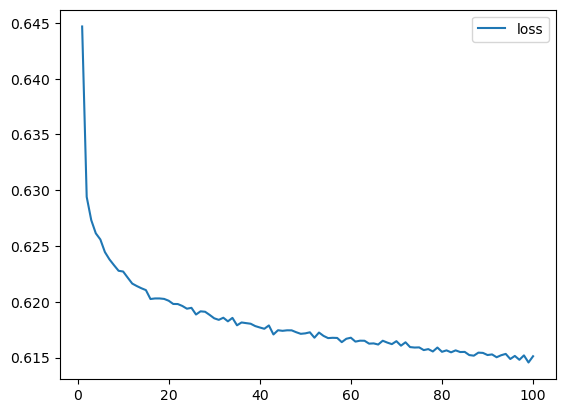

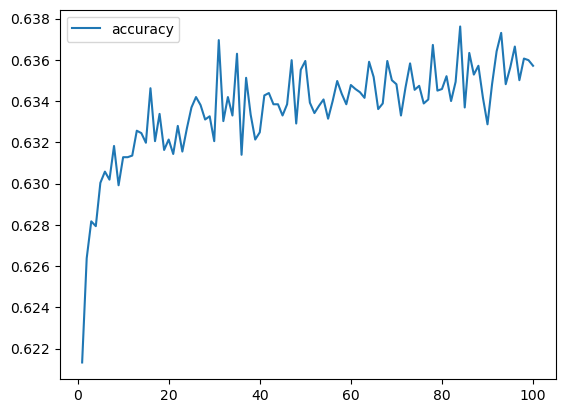

In [75]:
nn_A4_plot = pd.DataFrame(fit_model_A4.history, index=range(1, len(fit_model_A4.history["loss"]) + 1))
display(nn_A4_plot.plot(y="loss"))
display(nn_A4_plot.plot(y="accuracy"))

In [76]:
# Set the model's file path
file_path_4 = Path('saved_models/AlphabetSoup_A4.h5')

# Export your model to a HDF5 file
nn_A4.save(file_path_4)

# Alternative Model 5: Feature Engineering Again

In [77]:
# Read copy of applicants_data.csv into new df for feature engineering 
applicant_data_df_A5 = pd.read_csv(Path('Resources/applicants_data.csv'))

# Drop EIN and NAME as before.
# Also drop STATUS and SPECIAL CONSIDERATIONS (don't know to what they refer, and the sets are very imbalanced)
applicant_data_df_A5 = applicant_data_df_A5.drop(columns=['EIN','NAME','SPECIAL_CONSIDERATIONS','STATUS'])
applicant_data_df_A5

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1
...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,0,5000,0
34297,T5,Independent,C3000,ProductDev,Association,0,5000,1


In [78]:
# Create a list of categorical variables 
categorical_variables_A5 = list(applicant_data_df_A5.dtypes[applicant_data_df_A5.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables_A5

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [79]:
# Create a OneHotEncoder instance
enc_A5 = OneHotEncoder(sparse=False)

# Encode the categorical variables using OneHotEncoder
encoded_data_A5 = enc_A5.fit_transform(applicant_data_df_A5[categorical_variables_A5])


# Create a DataFrame with the encoded variables
encoded_df_A5 = pd.DataFrame(
    encoded_data_A5,
    columns = enc_A5.get_feature_names_out(categorical_variables_A5)
)

# drop categorical columns from applicant df
applicant_data_df_A5 = applicant_data_df_A5.drop(columns = categorical_variables_A5)

# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
encoded_df_A5 = pd.concat(
    [
        encoded_df_A5,
        applicant_data_df_A5
    ],
    axis = 1
)

# Review the Dataframe
encoded_df_A5

C:\Users\giffo\anaconda3\envs\dev\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,ASK_AMT,IS_SUCCESSFUL
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108590,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6692,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000,0
34295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000,0
34296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000,0
34297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000,1


### Split into features and targets

In [80]:
# Define the target set y using the IS_SUCCESSFUL column
y = encoded_df_A5['IS_SUCCESSFUL']

# Display a sample of y
y.head()

0    1
1    1
2    0
3    1
4    1
Name: IS_SUCCESSFUL, dtype: int64

In [81]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = encoded_df_A5.drop(columns='IS_SUCCESSFUL')

# Review the features DataFrame
X.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,ASK_AMT
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108590
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6692
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,142590


### Split

In [82]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


### Scale

In [83]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [84]:
# Define the the number of inputs (features) to the model
number_input_features_A5 = len(X_train.iloc[0])

# Define the number of neurons in the output layer
number_output_neurons_A5= 1

# Review
print(f"Input Features: {number_input_features_A5}, Output Neurons: {number_output_neurons_A5}")

Input Features: 113, Output Neurons: 1


In [85]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A5 = (number_input_features_A5 + number_output_neurons_A5) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A5

57

In [86]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer2_A5 = (number_input_features_A5 + number_output_neurons_A5) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer2_A5

57

In [87]:
# Create the Sequential model instance
nn_A5 = Sequential()

In [88]:
# First hidden layer
nn_A5.add(Dense(units=hidden_nodes_layer1_A5, input_dim = number_input_features_A5, activation = 'relu'))

# Second hidden layer
nn_A5.add(Dense(units=hidden_nodes_layer2_A5, activation = 'relu'))

# Output layer
nn_A5.add(Dense(units=number_output_neurons_A5, activation = 'sigmoid'))

# Check the structure of the model
nn_A5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 57)                6498      
                                                                 
 dense_19 (Dense)            (None, 57)                3306      
                                                                 
 dense_20 (Dense)            (None, 1)                 58        
                                                                 
Total params: 9,862
Trainable params: 9,862
Non-trainable params: 0
_________________________________________________________________


In [89]:
# Compile the model
nn_A5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [90]:
# Fit the model
fit_model_A5 = nn_A5.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5764 - accuracy: 0.7154
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5538 - accuracy: 0.7306
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5506 - accuracy: 0.7306
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5471 - accuracy: 0.7325
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5467 - accuracy: 0.7328
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5451 - accuracy: 0.7343
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5436 - accuracy: 0.7333
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5433 - accuracy: 0.7343
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5420 - accuracy: 0.7352
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5418 - accura

In [91]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss_A5, model_accuracy_A5 = nn_A5.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss_A5}, Accuracy: {model_accuracy_A5}")

268/268 - 0s - loss: 0.5669 - accuracy: 0.7282 - 380ms/epoch - 1ms/step
Loss: 0.5668572783470154, Accuracy: 0.7281632423400879


<Axes: >

<Axes: >

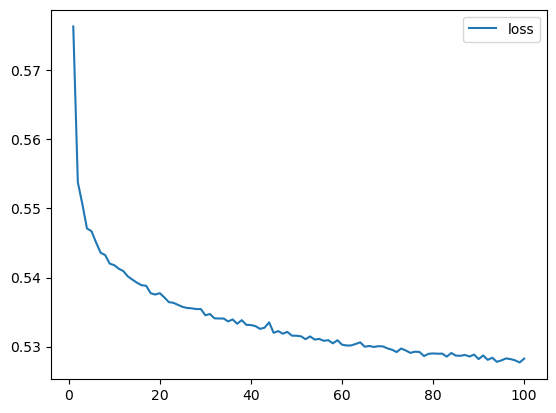

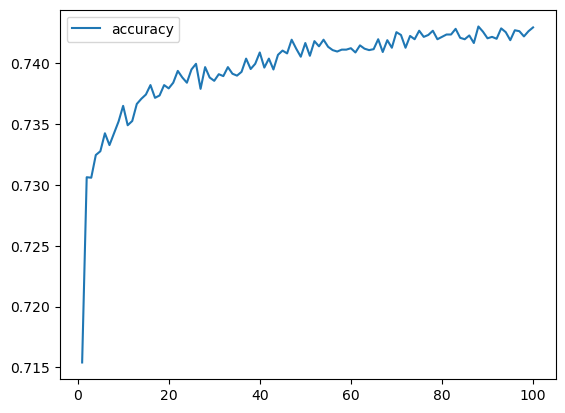

In [92]:
nn_A5_plot = pd.DataFrame(fit_model_A5.history, index=range(1, len(fit_model_A5.history["loss"]) + 1))
display(nn_A5_plot.plot(y="loss"))
display(nn_A5_plot.plot(y="accuracy"))

In [93]:
# Set the model's file path
file_path_5 = Path('saved_models/AlphabetSoup_A5.h5')

# Export your model to a HDF5 file
nn_A5.save(file_path_5)

# After finishing your models, display the accuracy scores achieved by each model, and compare the results.

In [94]:
print("MODEL RESULTS")

# Display the model loss and accuracy results
print(f"Original - Loss: {model_loss}, Accuracy: {model_accuracy}")
print(f"Alt Model 1 - Loss: {model_loss_A1}, Accuracy: {model_accuracy_A1}")
print(f"Alt Model 2 - Loss: {model_loss_A2}, Accuracy: {model_accuracy_A2}")
print(f"Alt Model 3 - Loss: {model_loss_A3}, Accuracy: {model_accuracy_A3}")
print(f"Alt Model 4 - Loss: {model_loss_A4}, Accuracy: {model_accuracy_A4}")
print(f"Alt Model 5 - Loss: {model_loss_A5}, Accuracy: {model_accuracy_A5}")

MODEL RESULTS
Original - Loss: 0.5517609119415283, Accuracy: 0.7300291657447815
Alt Model 1 - Loss: 0.5688307285308838, Accuracy: 0.7289795875549316
Alt Model 2 - Loss: 0.5595952868461609, Accuracy: 0.7308454513549805
Alt Model 3 - Loss: 0.5528090596199036, Accuracy: 0.729912519454956
Alt Model 4 - Loss: 0.634437084197998, Accuracy: 0.6327697038650513
Alt Model 5 - Loss: 0.5668572783470154, Accuracy: 0.7281632423400879


# Save each of your alternative models as an HDF5 file.


Models were saved as part of the prior steps. Please see /saved_models.